##### import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sources import Cfg
import nn_template.data_augmentation
import nn_template.model
import nn_template.datasets
from nn_template.model import Model
import nn_template.optuna

### Load Dataset

In [3]:
cfg = Cfg.Parser('yaml-demos/demo.yaml').get_config()

In [4]:
train = cfg['datasets.train'].dataset()
validate = cfg['datasets.validate'].dataset()
test = cfg['datasets.test.DRIVE'].dataset()

In [5]:
data = train[0]


In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25, 25)

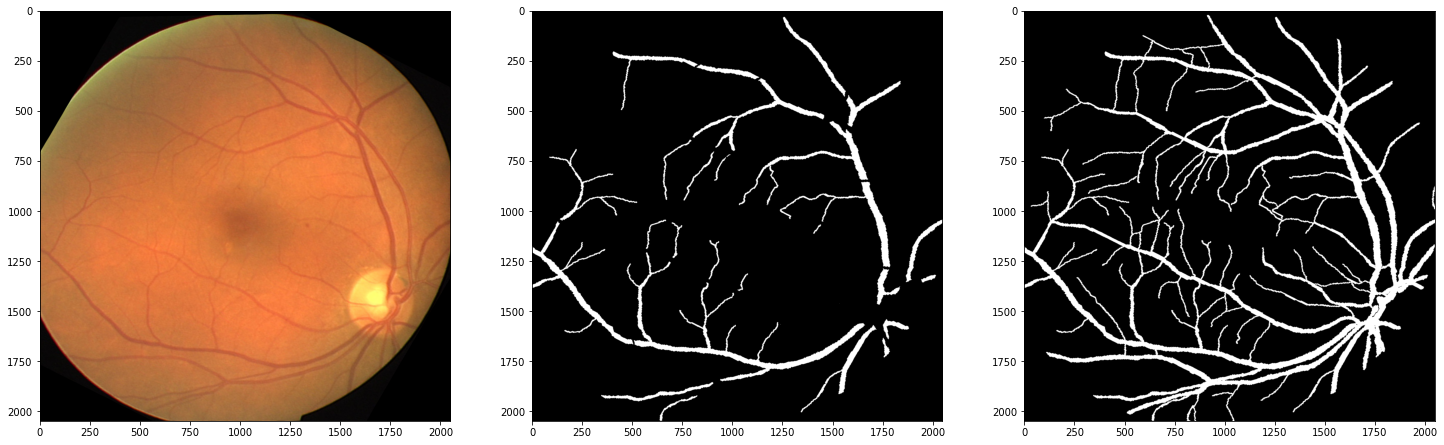

In [9]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(data['x'].permute((1,2,0)).flip(2))
ax[1].imshow(data['y'], cmap='gray', vmax=1)
ax[2].imshow(data['mask'], cmap='gray')